In [1]:
import json
import csv
import requests
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd
import seaborn as sns
sns.set_theme(palette="tab10")

In [2]:
# Get BSO data
with open("data/bso_2021.jsonl") as f:
    bso_data = [json.loads(line) for line in f]

# Create dataframe
bso_df = pd.DataFrame(bso_data)
display(bso_df.head(5))

,affiliations,authors,bso_classification,bso_local_affiliations,bsso_classification,coi,datasource,detected_countries,doi,domains,...,author_useful_rank_countries,observation_dates,oa_details,external_ids,hal_id,has_coi,classifications,fundings,competing_interests,funding
0,"[{'detected_countries': ['fr'], 'name': 'Servi...",[{'affiliations': [{'detected_countries': ['fr...,Medical research,[130015506],"{'field': ['Neurosciences', 'Oncology and Carc...",None,pubmed,[fr],10.1016/j.neuchi.2017.10.006,[health],...,[fr],"[2019, 2020, 2021Q4, 2018]","{'2019': {'snapshot_date': '20191122', 'observ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'detected_countries': ['us'], 'name': 'Depar...",[{'affiliations': [{'detected_countries': ['us...,Medical research,NaN,"{'field': ['Clinical Sciences'], 'field_journa...",None,pubmed,"[us, fr]",10.23736/s0390-5616.18.04258-3,[health],...,[us],[2021Q4],"{'2021Q4': {'snapshot_date': '20211201', 'obse...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'detected_countries': ['fr'], 'name': 'Depar...",[{'affiliations': [{'detected_countries': ['fr...,Medical research,NaN,{'field': ['Other Medical and Health Sciences'...,None,pubmed,"[fr, it]",10.1097/icb.0000000000000741,[health],...,[fr],"[2019, 2020, 2021Q4, 2018]","{'2019': {'snapshot_date': '20191122', 'observ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'detected_countries': ['fr'], 'name': 'Dépar...",[{'affiliations': [{'detected_countries': ['fr...,Medical research,[180036048],"{'field': ['Oncology and Carcinogenesis'], 'fi...",None,pubmed,[fr],10.1016/j.neuchi.2017.12.006,[health],...,[fr],"[2019, 2020, 2021Q4, 2018]","{'2019': {'snapshot_date': '20191122', 'observ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'detected_countries': ['fr'], 'name': 'Inser...",[{'affiliations': [{'detected_countries': ['fr...,Medical research,NaN,"{'field': ['Neurosciences'], 'field_journal_ti...",None,pubmed,[fr],10.1016/j.neuchi.2018.03.002,[health],...,[fr],"[2019, 2020, 2021Q4, 2018]","{'2019': {'snapshot_date': '20191122', 'observ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get OpenAlex data 
alex_df = pd.read_json("data/openalex_2021.json.gz")
display(alex_df.head(5))

In [ ]:
# Number of publications
bso_n = bso_df.shape[0]
alex_n = alex_df.shape[0]
print(f"Number of BSO publications : {bso_n}")
print(f"Number of OpenAlex publications : {alex_n}")
print(f"Total publications : {(bso_n + alex_n)}")

Number of BSO publications : 101923
Number of OpenAlex publications : 215365
Total publications : 317288


In [ ]:
# Fix OpenAlex dois
alex_df["doi"] = alex_df["doi"].apply(lambda x: x.removeprefix("https://doi.org/") if x is not None else None)

In [ ]:
# Get doi lists
bso_doi = list(set(bso_df["doi"].dropna().to_list()))
alex_doi = list(set(alex_df["doi"].dropna().to_list()))
print(f"Number of BSO doi : {len(bso_doi)}/{bso_n}")
print(f"Number of OpenAlex doi : {len(alex_doi)}/{alex_n}")

Number of BSO doi : 101923/101923
Number of OpenAlex doi : 146533/215365


In [ ]:
# Common dois
common_doi = list(set(bso_doi).intersection(alex_doi))
print(f"Number of doi in both BSO and OpenAlex : {len(common_doi)}")

# Uncommon dois
only_alex_doi = list(set(alex_doi).difference(bso_doi))
only_bso_doi = list(set(bso_doi).difference(alex_doi))
print(f"Number of doi only in BSO : {len(only_bso_doi)}")
print(f"Number of doi only in OpenAlex : {len(only_alex_doi)}")

Number of doi in both BSO and OpenAlex : 83472
Number of doi only in BSO : 18451
Number of doi only in OpenAlex : 63061


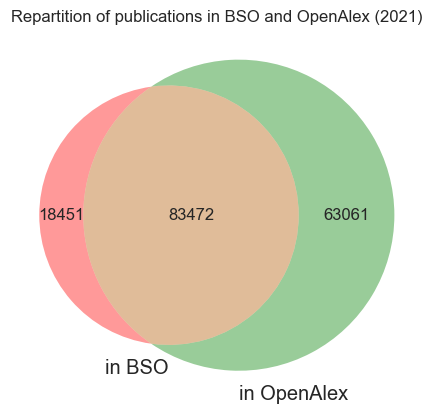

In [ ]:
# Draw venn diagram 
title = "Repartition of publications in BSO and OpenAlex (2021)"
venn2(subsets=(len(only_bso_doi), len(only_alex_doi), len(common_doi)), set_labels=("in BSO", "in OpenAlex"))
plt.title(title)
plt.savefig("output/" + title.lower().replace(" ", "_") + ".png")
plt.show()

In [ ]:
# Get primary publisher
alex_df["primary_publisher"] = alex_df["primary_location"].apply(lambda x: x.get("source").get("host_organization_name") if x and x.get("source") else None)

Text(0, 0.5, 'publishers')

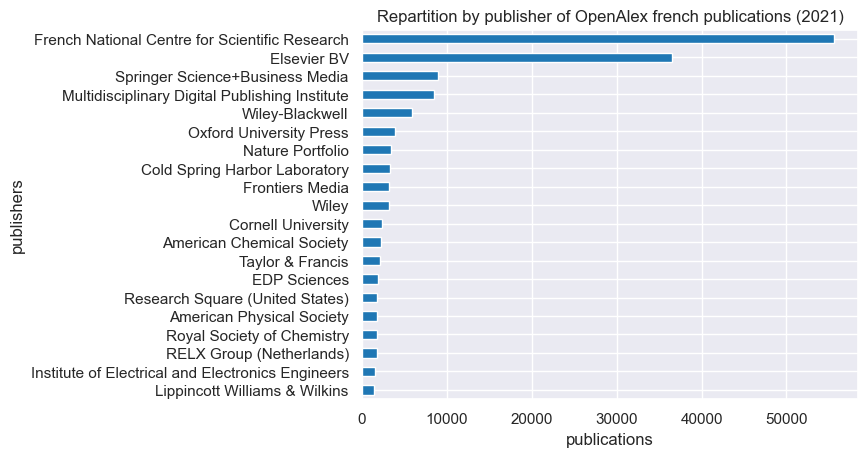

In [ ]:
# Draw chart
title = "Repartition by publisher of OpenAlex french publications (2021)"
alex_df["primary_publisher"].value_counts().sort_values().tail(20).plot(kind="barh")
plt.title(title)
plt.xlabel("publications")
plt.ylabel("publishers")

In [ ]:
# Create data frame with only OpenAlex publications (missing in BSO)
only_alex_df = alex_df[alex_df["doi"].isin(only_alex_doi)].drop_duplicates(subset=["doi"])

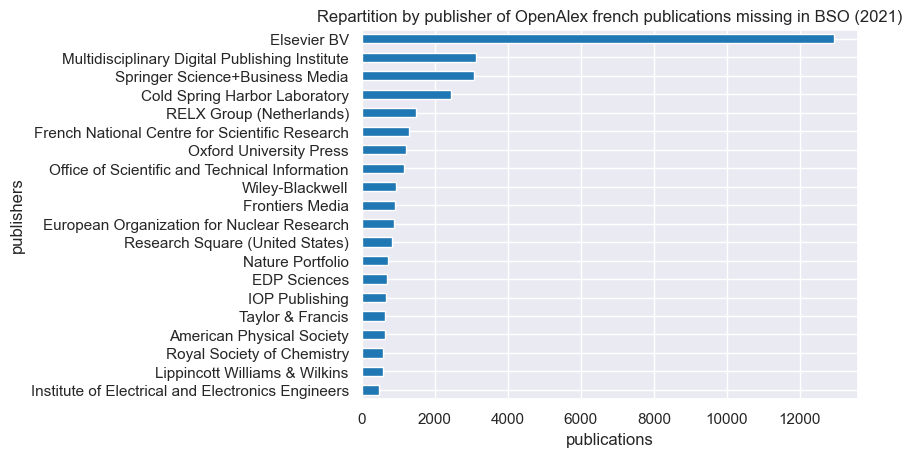

In [ ]:
# Draw chart
title = "Repartition by publisher of OpenAlex french publications missing in BSO (2021)"
only_alex_df["primary_publisher"].value_counts().sort_values().tail(20).plot(kind="barh")
plt.title(title)
plt.xlabel("publications")
plt.ylabel("publishers")
plt.savefig("output/" + title.lower().replace(" ", "_") + ".png")

In [ ]:
only_alex_df["primary_publisher"].value_counts(normalize=True)

primary_publisher
Elsevier BV                                       0.287274
Multidisciplinary Digital Publishing Institute    0.069278
Springer Science+Business Media                   0.068102
Cold Spring Harbor Laboratory                     0.053989
RELX Group (Netherlands)                          0.032664
                                                    ...   
European Society of Medicine                      0.000022
Exeley Inc                                        0.000022
Medip Academy                                     0.000022
Maison de l'Orient et de la Méditerranée          0.000022
Associação Brasileira de Estudos Canadenses       0.000022
Name: proportion, Length: 1177, dtype: float64

In [ ]:
# Check type of elsevier publications
only_alex_df[only_alex_df["primary_publisher"] == "Elsevier BV"]["type"].value_counts()

type
article      12914
editorial       16
erratum         13
paratext         1
other            1
letter           1
Name: count, dtype: int64

In [ ]:
alex_publishers = alex_df["primary_publisher"].value_counts().head(20)
only_alex_publishers = only_alex_df["primary_publisher"].value_counts()
only_alex_publishers_rate = (only_alex_publishers / alex_publishers * 100).dropna()

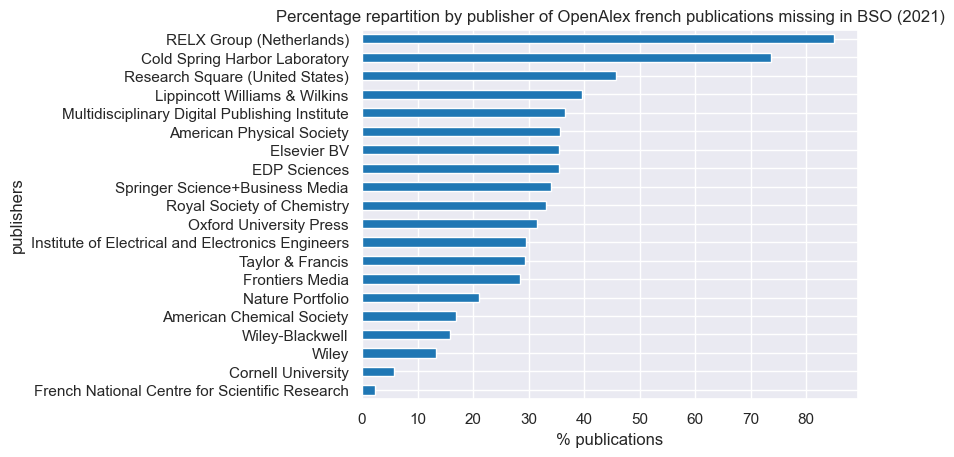

In [ ]:
# Draw chart
title = "Percentage repartition by publisher of OpenAlex french publications missing in BSO (2021)"
only_alex_publishers_rate.sort_values().head(20).plot(kind="barh")
plt.title(title)
plt.xlabel("% publications")
plt.ylabel("publishers")
plt.savefig("output/" + title.lower().replace(" ", "_") + ".png")

In [ ]:
only_alex_df["primary_publisher"].value_counts()

primary_publisher
Elsevier BV                                       12946
Multidisciplinary Digital Publishing Institute     3122
Springer Science+Business Media                    3069
Cold Spring Harbor Laboratory                      2433
RELX Group (Netherlands)                           1472
                                                  ...  
European Society of Medicine                          1
Exeley Inc                                            1
Medip Academy                                         1
Maison de l'Orient et de la Méditerranée              1
Associação Brasileira de Estudos Canadenses           1
Name: count, Length: 1177, dtype: int64

In [ ]:
# Get sample of some publishers publications
publishers = ["Elsevier BV", "RELX Group (Netherlands)", "Cold Spring Harbor Laboratory"]
focus_df = only_alex_df[only_alex_df["primary_publisher"].isin(publishers)]
print(f"Focus on {focus_df.shape[0]} publications")

focus_sample_df = focus_df.groupby("primary_publisher").apply(lambda x: x.sample(50)).reset_index(drop=True)
print(f"With sample of 50 publications per publisher : {focus_sample_df.shape[0]}")

Focus on 16851 publications
With sample of 50 publications per publisher : 150


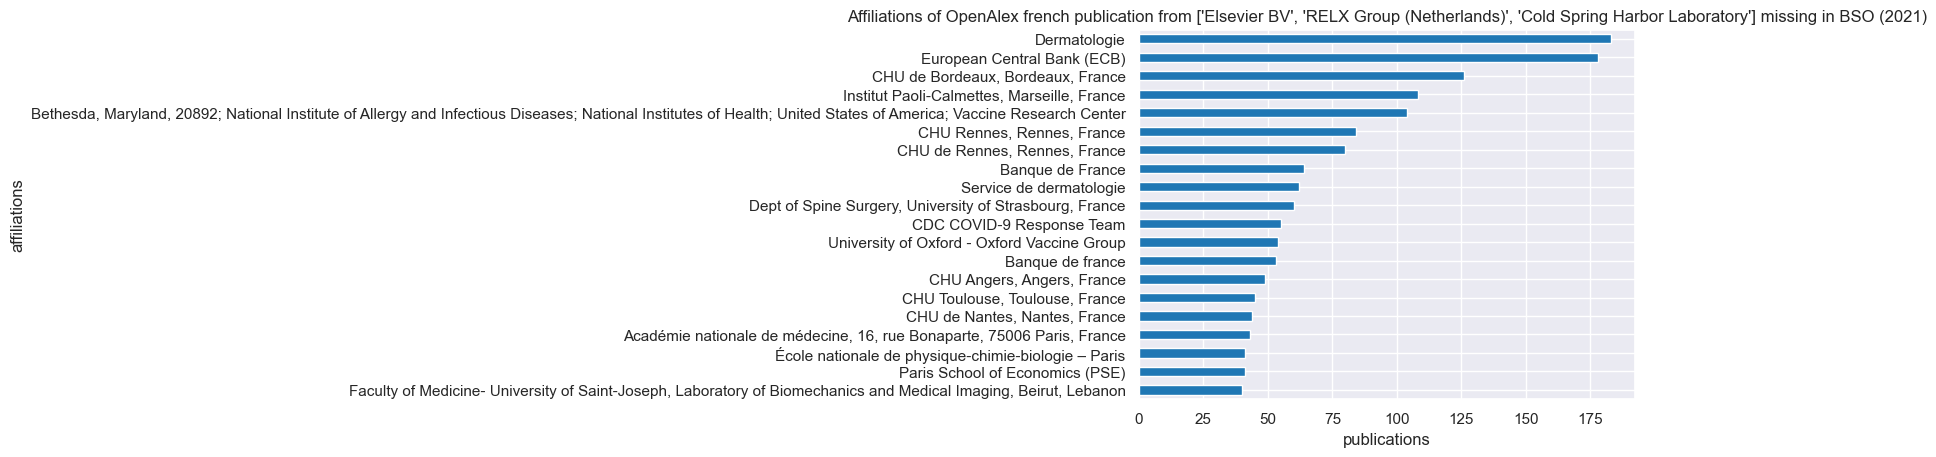

In [ ]:
# Get french affiliations from only open alex with specific publisher(s)
publishers = publishers
only_alex_french_affiliations = {}

def get_french_affiliation_name(row):
    for author in row:
        affiliation = author.get("raw_affiliation_string")
        if affiliation:
            only_alex_french_affiliations[affiliation] = only_alex_french_affiliations.get(affiliation, 0) + 1

only_alex_df[only_alex_df["primary_publisher"].isin(publishers)]["authorships"].apply(get_french_affiliation_name)

title = f"Affiliations of OpenAlex french publication from {publishers} missing in BSO (2021)"
pd.Series(only_alex_french_affiliations).sort_values().tail(20).plot(kind="barh")
plt.title(title)
plt.xlabel("publications")
plt.ylabel("affiliations")
plt.savefig("output/" + title.lower().replace(" ", "_") + ".png")

In [ ]:
# Save focus doi
focus_sample_df[["doi", "primary_publisher"]].to_csv("output/150_doi_of_publications_from_openalex_missing_in_bso.csv")

In [ ]:
# Save elsevier missing doi
only_alex_df[only_alex_df["primary_publisher"] == "Elsevier BV"]["doi"].to_csv("output/elsevier_doi_of_publications_from_openalex_missing_in_bso.csv")

In [ ]:
only_alex_df.columns

Index(['id', 'doi', 'title', 'display_name', 'publication_year',
       'publication_date', 'ids', 'language', 'primary_location', 'type',
       'type_crossref', 'open_access', 'authorships',
       'countries_distinct_count', 'institutions_distinct_count',
       'corresponding_author_ids', 'corresponding_institution_ids', 'apc_list',
       'apc_paid', 'has_fulltext', 'cited_by_count', 'biblio', 'is_retracted',
       'is_paratext', 'concepts', 'mesh', 'locations_count', 'locations',
       'best_oa_location', 'sustainable_development_goals', 'grants',
       'referenced_works_count', 'referenced_works', 'related_works',
       'ngrams_url', 'abstract_inverted_index', 'cited_by_api_url',
       'counts_by_year', 'updated_date', 'created_date', 'fulltext_origin',
       'is_authors_truncated', 'primary_publisher'],
      dtype='object')

In [ ]:
row = only_alex_df[only_alex_df["primary_publisher"] == "Elsevier BV"][["doi", "primary_publisher", "publication_year", "type", "authorships"]].head(1)
row

,doi,primary_publisher,publication_year,type,authorships
100,10.1016/j.annonc.2021.09.019,Elsevier BV,2021,article,"[{'author_position': 'first', 'author': {'id':..."


In [2]:
row = pd.DataFrame({"doi":"10.1016/j.annonc.2021.09.019", "publication_year":2021, "type":"article", "authorships": [{'author_position': 'middle', 'author': {'id': 'https://openalex.org/A5001814176', 'display_name': 'Fabrice André', 'orcid': None}, 'institutions': [{'id': 'https://openalex.org/I2801843802', 'display_name': 'Institut Gustave Roussy', 'ror': 'https://ror.org/0321g0743', 'country_code': 'FR', 'type': 'facility', 'lineage': ['https://openalex.org/I2801843802']}], 'countries': ['FR'], 'is_corresponding': False, 'raw_author_name': 'F. André', 'raw_affiliation_string': 'Breast Cancer Unit, Medical Oncology Department, Gustave Roussy—Cancer Campus, Villejuif, France', 'raw_affiliation_strings': ['Breast Cancer Unit, Medical Oncology Department, Gustave Roussy—Cancer Campus, Villejuif, France']}]})

In [ ]:
a = row["authorships"].values[0] if "authorships" in row else None
print(a[1])

{'author_position': 'middle', 'author': {'id': 'https://openalex.org/A5001814176', 'display_name': 'Fabrice André', 'orcid': None}, 'institutions': [{'id': 'https://openalex.org/I2801843802', 'display_name': 'Institut Gustave Roussy', 'ror': 'https://ror.org/0321g0743', 'country_code': 'FR', 'type': 'facility', 'lineage': ['https://openalex.org/I2801843802']}], 'countries': ['FR'], 'is_corresponding': False, 'raw_author_name': 'F. André', 'raw_affiliation_string': 'Breast Cancer Unit, Medical Oncology Department, Gustave Roussy—Cancer Campus, Villejuif, France', 'raw_affiliation_strings': ['Breast Cancer Unit, Medical Oncology Department, Gustave Roussy—Cancer Campus, Villejuif, France']}


In [31]:
a=None or []
("fr" in list(map(str.lower, a)))

False

In [40]:
from bso_coverage_tools import analyse_from_openalex

analyse_from_openalex(row, cli=False)

,doi,last_state,last_error,last_error_data
0,10.1016/j.annonc.2021.09.019,IN_FOSM_FR,OK,None
